## TODO
- write the backprob loop
- write gradient check
- save the model
- and then start testing models

In [116]:
import seaborn as sb
import numpy as np
import pdb
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# Load Data
train = np.genfromtxt('digitstrain.txt', delimiter=',')
test = np.genfromtxt('digitstest.txt', delimiter=',')
val = np.genfromtxt('digitsvalid.txt', delimiter=',')

## Plotting Image of a training input

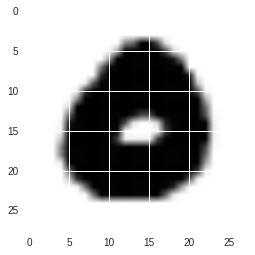

In [118]:
# Plotting the image
plt.imshow(train[0,:-1].reshape((28,28)))
## The image is squeezed row-wise

## Class description
```sh
graph - [num_nodes(int), num_nodes(int), ...]
each layer ends with sigmoid
graph ends with softmax and crossentropy loss
```

In [119]:
# Basic loss/activation functions and their gradients which are codenamed "inv"
# These functions are defined with input as numpy.matrix format.
# things may go haywire if numpy.array is used 
# even though numpy.matrix inherits properties from numpy.array
def cross_entropy_loss(vec, gt):
  return -gt*np.log(vec)
  
def sigmoid(mat):
  return 1./(1+ np.exp(-mat))

def inv_sigmoid(mat):
  return sigmoid(mat)*(1-sigmoid(mat))

def softmax(vec):
  return np.concatenate(
    tuple([np.exp(vec[i,:])*1./np.exp(vec[i,:]).sum() for i in range(vec.shape[0])])
    , axis = 0)

def inv_softmax_with_loss(vec, gt):
  # gt - ground truth in one hot vector format
  if (vec.shape != gt.shape):
    raise Exception("Prediction and Expected Values must have the same dimensions")
    
  return softmax(vec) - gt

def relu(value):
  if (value<=0):
    return 0
  else:
    return value

In [120]:
class history(object):
  def __init__(self, loss):
    self.loss = loss

## Model class NN

In [121]:
class NN(object):
  def __init__(self,graph):
    self.graph = graph
    self.weights = list()
    self.hist = history(10)
    
    prev_dim = -1
    for dim in self.graph:
        if (prev_dim > 0):
          # set the high and low bounds for the random initialization 
          # based on xxx rule
          high = np.sqrt(6.0/(prev_dim + dim))
          low = -high
          # prev_dim + 1 to include a row for bias 
          self.weights.append(np.random.uniform(low=low,high=high,size=(prev_dim+1,dim)))
        prev_dim = dim

  def forward(self,X,limit = 0, activation = True):
    # We use the forward function to calculate the forward prop
    ## while training the model, various segments of the forward prop are required
    ## which need to be extracted at the right times
    # "limit" and "activation" define the layers that have to be removed from the end
    ## limit = 0 and activation=True implies complete calculation
    ## limit = 0 and activation=False ignores the softmax function but calculates till last layer
    ## limit = 1 and activation=True implies calculation till second-last layer w/ sigmoid
    ## limit = 1 and activation=False implies calculation till second-last layer w/o sgimoid
    ## now the limit belongs to [0,len(NN.weights)-1], hence with other values it will give junk
    # raise havoc if the limits are not correct
    if(limit >= len(self.weights) or limit < 0):
      raise Exception("Limits of the network are out of bounds")
    # add a column of ones to take care of the bias
    X = np.concatenate((X,np.expand_dims(np.ones_like(X[:,0]),axis=1)), axis = 1)
    # Converting input to matrix form
    X = np.mat(X)
    for k in range(len(self.weights)-relu(limit-1)-1):
      X = X*np.mat(self.weights[k]) ## Linear
      ## if activation=False skip the non-linear part
      if (activation == False):
        break
      X = sigmoid(X) ## Non-Linear
      X = np.concatenate((X,np.ones_like(X[:,0])), axis = 1)
    
    # if the limit is anything apart the last layer, return the calculated values
    if (limit > 0):
      return X
    
    X = X*np.mat(self.weights[-1]) ## Linear
    if (activation == True):
      return softmax(X) ## Non-Linear
    else: 
      return X

## Saving and loading the model

In [128]:
def save_model(model, filename):
  fl = open(filename,'wb')
  pkl.dump(model,fl)
  
def load_model(filename):
  fl = open(filename, 'rb')
  return pkl.load(fl)

In [125]:
model = NN([784,100,10])

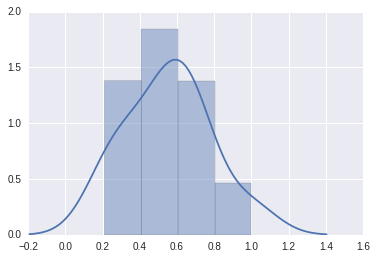

In [106]:
sb.distplot(model.forward(train[0:2,:-1],1)[0])

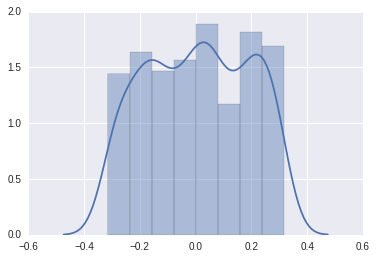

In [8]:
i = 2
sb.distplot(model.weights[i].reshape((np.prod(model.weights[i].shape),)))

In [48]:
print([model.weights[i].shape for i in range(len(model.weights))])

[(785, 100), (101, 10)]
